# Deep Learning with Keras

*Authors: Ra Inta and Evan Carey*

*Copyright 2018-2019, BH Analytics, LLC*

Deep Learning with Keras:

* A conceptual introduction to Artificial Neural Networks (ANNs)
* TensorFlow and Keras overview
* Defining the base input
* Building models by adding defined layers
* Loss functions, optimizers, and metrics
* Training models 
* Performance assessment
* Improving performance by increasing network depth and width, and decreasing overfitting by introducing network drop-out
* Persisting Keras models for future use

## Overview

The purpose of this section is to cover the foundations of Artificial Neural Networks (ANNs), as well as their relation to Deep Learning. We will first give an overview of various neural net architectures and then implement some key models using Keras and Tensorflow. We will also look at how to assess model performance and how to persist these models for future use. 

## Libraries

In [1]:
import os
import pathlib
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
## Enable inline plotting for graphics
%matplotlib inline
## Set default figure size to be larger 
## this may only work in matplotlib 2.0+!
matplotlib.rcParams['figure.figsize'] = [10.0,6.0]
## Enable multiple outputs from jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## Get Version information
print(sys.version)
print("Pandas version: {0}".format(pd.__version__))
print("Matplotlib version: {0}".format(matplotlib.__version__))
print("Numpy version: {0}".format(np.__version__))
print("Tensorflow version: {0}".format(tf.__version__))

3.8.2 (default, Mar 26 2020, 15:53:00) 
[GCC 7.3.0]
Pandas version: 1.2.4
Matplotlib version: 3.3.4
Numpy version: 1.20.1
Tensorflow version: 2.3.0


## Artificial Neural Networks (ANNs)

Artificial Neural Networks (ANNs; often further abbreviated to NNs) are inspired directly from our understanding of brain neurophysiology. An individual _neuron_ is the basic cell unit of our complex central nervous system. Each neuron takes inputs, in the form of electrical signals, and performs a number of simple transforms on these inputs, resulting in a simple output. These outputs are in turn fed as inputs to other neurons.

![Image of a neuron (public domain: https://commons.wikimedia.org/wiki/File:Neuron.jpg)](images/Neuron.jpg)

Artificial neurons are simplified analogs of these biological units, taking in a limited number of signals, performing simple operations on them, before emitting a limited number of output signals. The astounding computational capabilities of this class of algorithm arise from the networks built up using these simple units.

### Anatomy of a Neural Network 

An ANN is composed of _neurons_ (_nodes_) and _layers_. Each node performs the atomic operations of the network, defined by _activation functions_. Groups of nodes may form a layer, a distinct structure representing a stage of the network. Each layer acts like a filter, or function. At least two layers are defined: the _input layer_ and the _output layer_. In addition, there may be one or more layer that is neither an input nor an output; these are referred to as _hidden layers_:



![Achitecture of a typical Artificial Neural Network (ANN). The number of layers determine the _depth_ of the model; the number of neurons in each layer determine the _width_ of the model.](images/ANN_architecture_intro.png)

The purpose of ANNs is to approximate any arbitrary function, say, $f'(x)$. Each layer can be thought of as a successive function $f_i()$ acting on the previous layers. The particular composition of layers and nodes of a neural network is known as the _net architecture_.

In this framework, for the chicken-beef calculation we performed above, each linear comparison was performed within a node (neuron), after being fed inputs $x_1$ and $x_2$. The outputs were fed into the final, output, node. This architecture is a Multi-Layer Perceptron (MLP). It is a particular type of _feed-forward network_, because there are no layers that make use of feedback.

The activation function we chose (fairly organically!) was the Heaviside step function, $H(x)$.

### Activation functions

The purpose of an activation function is to polarize the network (_i.e._ provide directionality), as well as condition the signals propagated throughout (very often regulated to have a limited output range). The most common activation functions are:

 *  **Perceptron** (Heaviside): $\sigma(z) = \{ ^{1\textrm{ for }z > 0} _{0\textrm{ for z } \leq 0}$

 *  **Sigmoid** (logistic): $\sigma(z) = \frac{1}{1 + \exp(-z)}$
 
 * **ReLU** (Rectified Linear Unit): $\sigma(z) = \max{(0, z)}$

 *  **Softmax**: $\sigma(z)_j = \frac{\exp{(z_j)}}{\sum_{k}^{K} \exp{(z_k)}}$
 
Their response functions look like the following:

![Response functions of three of the most popular activation functions for neurons in ANNs.](images/activation_function_comparison.png)

The sigmoid (or logistic) activation function is a smoothed version of the step function, so has nicer analytic properties than the step function. However, it can be somewhat computationally expensive for large numbers of nodes and layers. The ReLU (Rectified Linear Unit) is a simpler function. Although, being piece-wise linear, it is still technically non-linear, it provides network polarity while retaining many properties of linearity which make these nice for approximating functions. ReLU-based neurons are much 'faster' to train because of their computational simplicity.

The softmax activation function is an ensemble function, often used for an aggregation step. It also has nice analytic properties, regulating the output based on the ensemble mean. This often favors a 'winner-takes-all' condition.

So much for the theory. How do we code these things?

### Introduction to Keras and Tensorflow


**Tensorflow**

TensorFlow was developed by the Google Brain team, released to the Apache foundation in late 2015. It is a symbolic, high-performance, math library with specialized and generalized math objects, particularly _tensors_, a generalization of vector arithmetic and calculus (hence the name). The mental model for TensorFlow computations is a computational graph, defined by tensors. It is designed to be seamlessly applied to a range of hardware types (including GPUs and a specialized AI accelerator application-specific integrated circuit - ASIC, the TPU---_Tensor Processing Unit_).  

**Tensorflow documentation:** https://www.tensorflow.org/

---
**Keras**

Keras is a high-level API to the neural network libraries CNTK, Theano and TensorFlow. Its high level of abstraction allows rapid prototyping of neural networks, with both convolution and recurrent network architectures. Its guiding principles are user-friendliness, modularity and to be easily extendible. Because it's written in Python, configuration and extension of functionality are relatively seamless within the Python eco-system. 

Keras is Greek for 'horn,' a reference to the vision-inducing spirits in the _Odyssey_.

**Keras documentation:** https://keras.io/

### Tensors and TensorFlow

The fundamental unit of computation within TensorFlow is the _tensor_. Tensors are generalizations of vector arithmetic and calculus, allowing linear operations on higher rank objects. These are used to partially define a computation, in the form of a data-flow graph, that will, when executed, produce an output value. TensorFlow constructs a graph based on tensor objects (`tf.Tensor`). This graph is then executed within a TensorFlow session (`tf.Session()`) instance.

We can simply generate a tensor object using `tf.Variable`:

In [5]:
odd_nums = tf.Variable([1, 3, 5, 7, 9, 11])  # Rank 1 tensor is a vector

It has the usual `.dtype` and `.shape` attributes: 

In [6]:
odd_nums.dtype
odd_nums.shape

tf.int32

TensorShape([6])

In [7]:
weird_hypercube = tf.Variable([ [ [43], [121.234] ], [ [987], [2134] ] ], dtype=tf.float64)

However, as mentioned, tensors in TensorFlow are _partially_ computed graph objects:

In [8]:
rank1 = tf.rank(odd_nums)
rank1

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [9]:
rank2 = tf.rank(weird_hypercube)
rank2

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [10]:
weird_hypercube

<tf.Variable 'Variable:0' shape=(2, 2, 1) dtype=float64, numpy=
array([[[  43.   ],
        [ 121.234]],

       [[ 987.   ],
        [2134.   ]]])>

Operations are not run until we have specified that our computation graph is complete. Note that the `tf.rank()` operations did not return an actual rank value. To execute operations on the tensors we just produced, we require a `tf.Session()` connection:

In [11]:
#with tf.Session() as sess:
 #   sess.run(rank1)
  #  sess.run(rank2)
dir(tf)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_API_MODULE',
 '_LazyLoader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__operators__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_compat',
 '_current_file_location',
 '_current_module',
 '_distutils',
 '_division',
 '_estimator_module',
 '_fi',
 '_inspect',
 '_ll',
 '_logging',
 '_main_dir',
 '_major_api_version',
 '_module_dir',
 '

In [12]:
dir(rank1)

['OVERLOADABLE_OPERATORS',
 '_USE_EQUALITY',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__complex__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_add_consumer',


Defining the details of your computation this way, and generating the necessary graphs and sessions, requires quite some thought and a lot of boiler-plate code (of which is not particularly Pythonic!). 

There are so many commonly used operations and architectures, that a higher level API would be very useful! This is where Keras comes in.

## Implementing a simple linear regression in a deep learning framework

Let's simulate some basic data, then implement a linear relationship with noise as a test case to estimate the weights from the data.

In [13]:
## simulate linear model
np.random.seed(12)
n = 500
x1 = np.random.normal(loc=100,
                      scale=10,
                      size=n)
## simulate outcome
error_1 = \
    np.random.normal(loc=0,
                     scale=80,
                     size=n)
## map to outcome
y1 = 4 + 33*x1 + error_1

/home/s/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

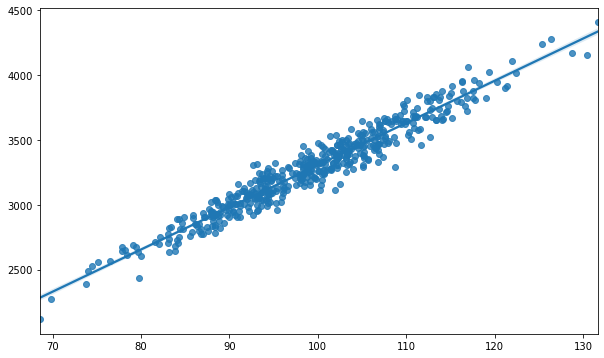

In [14]:
## plot relationship
sns.regplot(x1,y1)

In [15]:
from keras import models
from keras import layers
from keras import optimizers
## build the model using a function since we will call it mutliple times
def build_model1():
    model = models.Sequential()
    model.add(layers.Dense(1,
                           activation = 'linear',
                           input_dim=1))
    sgd = optimizers.SGD(lr=0.2)
    model.compile(optimizer =sgd, 
                  loss = 'mse',
                  metrics = ['mae'])
    return model

In [16]:
## scale data
from sklearn import preprocessing
x1_scale = preprocessing.scale(x1)

## fit this model/architecture to my data
regr = build_model1()
regr.fit(x1_scale,
         y1,
         epochs = 20,
         batch_size = 20)

Epoch 1/20
25/25 [==============================] - 0s 3ms/step - loss: 700693.2500 - mae: 370.5903
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 7168.1475 - mae: 68.2416
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 7097.4834 - mae: 68.0761
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 7073.3730 - mae: 67.7776
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 7168.7275 - mae: 67.4621
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 7215.2734 - mae: 68.5829
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 7070.6230 - mae: 67.7748
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 7119.1987 - mae: 67.5071
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 7179.1201 - mae: 68.2860
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 7225.3711 - mae: 68.4791
Epoch 11/20
25/25 [=======

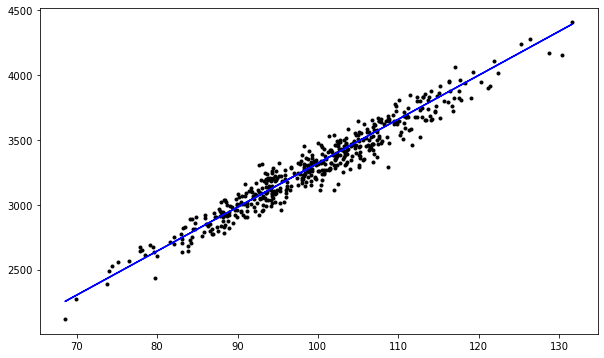

In [17]:
from pylab import *
## plot predictions
plot(x1, y1, 'k.',
     x1, regr.predict(x1_scale), 'b')

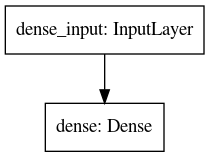

In [18]:
## utility for visualzing the model
from keras.utils import plot_model
plot_model(regr,
           to_file='./model.png')

In [19]:
## summarize model
regr.summary()

## extract weights
[layer.get_weights() for layer in regr.layers]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


[[array([[340.7904]], dtype=float32), array([3299.8452], dtype=float32)]]

In [20]:
## simulate linear model
np.random.seed(12)
n = 500
x2 = np.random.normal(loc=0,
                      scale=3,
                      size=n)
## simulate outcome
error_1 = \
    np.random.normal(loc=0,
                     scale=0.2,
                     size=n)
## map to outcome
y2 = 4 + np.sin(x2) + error_1

/home/s/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

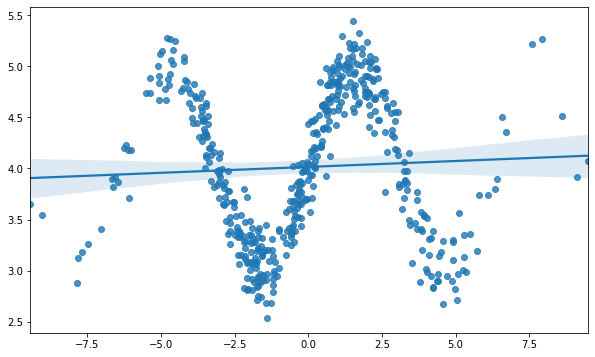

In [21]:
## plot relationship
sns.regplot(x2,y2)

In [22]:
## build the model using a function since we will call it mutliple times
def build_model2():
    model = models.Sequential()
    model.add(layers.Dense(64,
                         activation = 'relu',
                         input_dim=1))
    model.add(layers.Dense(1,
                           activation = 'linear'))
    sgd = optimizers.SGD(lr=0.2)
    model.compile(optimizer =sgd, 
                  loss = 'mse',
                  metrics = ['mae'])
    return model

In [23]:
## scale data
x2_scale = preprocessing.scale(x2)

## fit this model/architecture to my data
regr2 = build_model2()
regr2.fit(x2_scale,
         y2,
         epochs = 20,
         batch_size = 20)

Epoch 1/20
25/25 [==============================] - 0s 4ms/step - loss: 1.3055 - mae: 0.8329
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6789 - mae: 0.6777
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5015 - mae: 0.5821
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4307 - mae: 0.5452A: 0s - loss: 0.5155 - mae: 0.60
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5926 - mae: 0.6037A: 0s - loss: 0.6687 - mae: 0.635
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4147 - mae: 0.5273
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5062 - mae: 0.5613
Epoch 8/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3787 - mae: 0.4902
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4916 - mae: 0.5365
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4345 - mae: 0.5231
Epoc

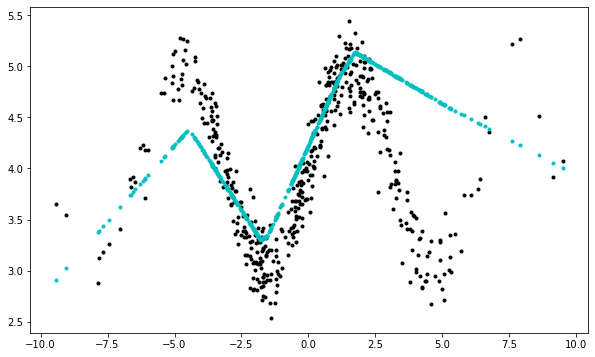

In [24]:
from pylab import *
## plot predictions
plot(x2, y2, 'k.',
     x2, regr2.predict(x2_scale), 'c.')

In [25]:
## fit this model/architecture to my data
regr3 = build_model2()
regr3.fit(x2_scale,
         y2,
         epochs = 100,
         batch_size = 20)

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 1.5927 - mae: 0.9105
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4977 - mae: 0.5799
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4218 - mae: 0.5418
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.4253 - mae: 0.5338
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4317 - mae: 0.5147
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4338 - mae: 0.5392
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.4546 - mae: 0.5258A: 0s - loss: 0.4584 - mae: 0.525
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9260 - mae: 0.7190
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5023 - mae: 0.6106
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4412 - mae: 0.5750
Epoch 11/100
25/25 [======

25/25 [==============================] - 0s 3ms/step - loss: 0.3775 - mae: 0.4822
Epoch 87/100
25/25 [==============================] - ETA: 0s - loss: 0.3954 - mae: 0.490 - 0s 4ms/step - loss: 0.3844 - mae: 0.4730
Epoch 88/100
25/25 [==============================] - ETA: 0s - loss: 0.4074 - mae: 0.474 - 0s 6ms/step - loss: 0.4208 - mae: 0.4845
Epoch 89/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3994 - mae: 0.4818
Epoch 90/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4032 - mae: 0.4858
Epoch 91/100
25/25 [==============================] - 0s 6ms/step - loss: 0.3948 - mae: 0.4823A: 0s - loss: 0.4064 - mae: 0.492
Epoch 92/100
25/25 [==============================] - 0s 8ms/step - loss: 0.3865 - mae: 0.4805A: 0s - loss: 0.3806 - mae: 0.475
Epoch 93/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4101 - mae: 0.4866
Epoch 94/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3447 - mae: 0.4437
Epoch 95/100
25/

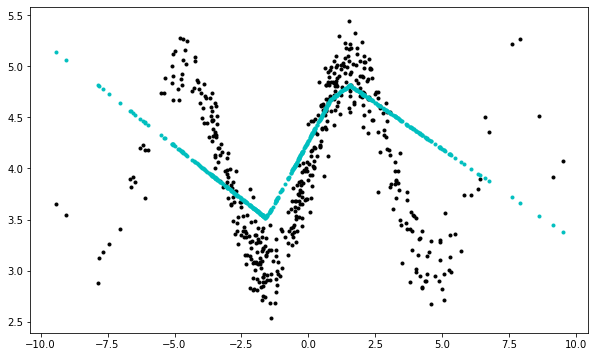

In [26]:
from pylab import *
## plot predictions
plot(x2, y2, 'k.',
     x2, regr3.predict(x2_scale), 'c.')

In [27]:
## fit this model/architecture to my data
regr4 = build_model2()
regr4.fit(x2_scale,
         y2,
         epochs = 300,
         batch_size = 20)

Epoch 1/300
25/25 [==============================] - 0s 3ms/step - loss: 1.3253 - mae: 0.8040
Epoch 2/300
25/25 [==============================] - 0s 7ms/step - loss: 0.4954 - mae: 0.5842
Epoch 3/300
25/25 [==============================] - 0s 7ms/step - loss: 0.5996 - mae: 0.6301
Epoch 4/300
25/25 [==============================] - 0s 6ms/step - loss: 0.4823 - mae: 0.5565
Epoch 5/300
25/25 [==============================] - 0s 5ms/step - loss: 0.5885 - mae: 0.5924
Epoch 6/300
25/25 [==============================] - 0s 7ms/step - loss: 0.4136 - mae: 0.5258
Epoch 7/300
25/25 [==============================] - 0s 6ms/step - loss: 0.4652 - mae: 0.5240
Epoch 8/300
25/25 [==============================] - 0s 3ms/step - loss: 0.3500 - mae: 0.4738
Epoch 9/300
25/25 [==============================] - ETA: 0s - loss: 0.3457 - mae: 0.462 - 0s 10ms/step - loss: 0.3369 - mae: 0.4579
Epoch 10/300
25/25 [==============================] - 0s 6ms/step - loss: 0.8283 - mae: 0.6066
Epoch 11/300
25/25 [

25/25 [==============================] - 0s 5ms/step - loss: 0.4736 - mae: 0.5857
Epoch 86/300
25/25 [==============================] - 0s 6ms/step - loss: 0.4652 - mae: 0.5758
Epoch 87/300
25/25 [==============================] - 0s 5ms/step - loss: 0.4699 - mae: 0.5821
Epoch 88/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4596 - mae: 0.5727
Epoch 89/300
25/25 [==============================] - 0s 4ms/step - loss: 0.4630 - mae: 0.5728
Epoch 90/300
25/25 [==============================] - 0s 2ms/step - loss: 0.4570 - mae: 0.5708
Epoch 91/300
25/25 [==============================] - 0s 1ms/step - loss: 0.4609 - mae: 0.5739
Epoch 92/300
25/25 [==============================] - 0s 2ms/step - loss: 0.4838 - mae: 0.5870
Epoch 93/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4697 - mae: 0.5773
Epoch 94/300
25/25 [==============================] - 0s 2ms/step - loss: 0.4580 - mae: 0.5710
Epoch 95/300
25/25 [==============================] - 0s 2ms/st

25/25 [==============================] - ETA: 0s - loss: 0.4483 - mae: 0.567 - 0s 3ms/step - loss: 0.4622 - mae: 0.5716
Epoch 170/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4643 - mae: 0.5753
Epoch 171/300
25/25 [==============================] - 0s 4ms/step - loss: 0.4714 - mae: 0.5775
Epoch 172/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4611 - mae: 0.5739
Epoch 173/300
25/25 [==============================] - 0s 4ms/step - loss: 0.4515 - mae: 0.5647
Epoch 174/300
25/25 [==============================] - 0s 5ms/step - loss: 0.4637 - mae: 0.5694
Epoch 175/300
25/25 [==============================] - 0s 5ms/step - loss: 0.4532 - mae: 0.5637
Epoch 176/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4591 - mae: 0.5702
Epoch 177/300
25/25 [==============================] - 0s 4ms/step - loss: 0.4521 - mae: 0.5582
Epoch 178/300
25/25 [==============================] - 0s 5ms/step - loss: 0.4564 - mae: 0.5686
Epoch 179/300
25

25/25 [==============================] - 0s 4ms/step - loss: 0.4594 - mae: 0.5690
Epoch 253/300
25/25 [==============================] - 0s 4ms/step - loss: 0.4557 - mae: 0.5696
Epoch 254/300
25/25 [==============================] - 0s 2ms/step - loss: 0.4605 - mae: 0.5674
Epoch 255/300
25/25 [==============================] - 0s 2ms/step - loss: 0.4575 - mae: 0.5682
Epoch 256/300
25/25 [==============================] - 0s 1ms/step - loss: 0.4604 - mae: 0.5678
Epoch 257/300
25/25 [==============================] - 0s 1ms/step - loss: 0.4651 - mae: 0.5747
Epoch 258/300
25/25 [==============================] - 0s 1ms/step - loss: 0.4603 - mae: 0.5685
Epoch 259/300
25/25 [==============================] - 0s 1ms/step - loss: 0.4606 - mae: 0.5694
Epoch 260/300
25/25 [==============================] - 0s 2ms/step - loss: 0.4559 - mae: 0.5670
Epoch 261/300
25/25 [==============================] - 0s 1ms/step - loss: 0.4604 - mae: 0.5739
Epoch 262/300
25/25 [==============================] -

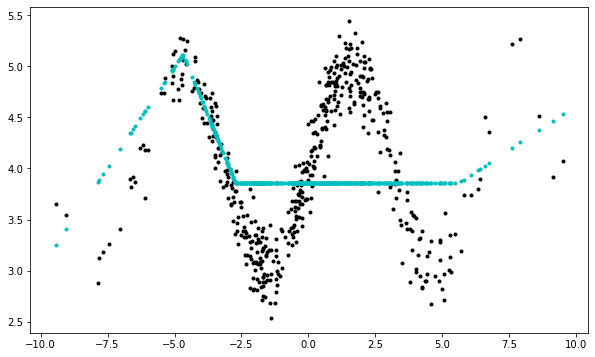

In [28]:
from pylab import *
## plot predictions
plot(x2, y2, 'k.',
     x2, regr4.predict(x2_scale), 'c.')